In [1]:
from google.colab import files
uploaded = files.upload()


Saving youtube_ad_revenue_dataset.csv to youtube_ad_revenue_dataset.csv


In [4]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/Content-Monetization-Modeler/youtube_ad_revenue_dataset.csv")
df


,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd
0,vid_3092,2024-09-24 10:50:40.993199,9936,1221.0,320.0,26497.214184,2.862137,228086,Entertainment,TV,IN,203.178237
1,vid_3459,2024-09-22 10:50:40.993199,10017,642.0,346.0,15209.747445,23.738069,736015,Gaming,Tablet,CA,140.880508
2,vid_4784,2024-11-21 10:50:40.993199,10097,1979.0,187.0,57332.658498,26.200634,240534,Education,TV,CA,360.134008
3,vid_4078,2025-01-28 10:50:40.993199,10034,1191.0,242.0,31334.517771,11.770340,434482,Entertainment,Mobile,UK,224.638261
4,vid_3522,2025-04-28 10:50:40.993199,9889,1858.0,477.0,15665.666434,6.635854,42030,Education,Mobile,CA,165.514388
...,...,...,...,...,...,...,...,...,...,...,...,...
122395,vid_2902,2024-12-14 10:50:40.993199,9853,1673.0,147.0,42075.704885,25.490195,210818,Education,Tablet,US,280.986396
122396,vid_3890,2024-07-13 10:50:40.993199,10128,1709.0,63.0,57563.703040,16.229133,878860,Music,Desktop,UK,354.612981
122397,vid_3934,2024-06-10 10:50:40.993199,10267,700.0,NaN,27549.714659,23.822365,576756,Tech,Tablet,CA,203.643106
122398,vid_4260,2024-12-22 10:50:40.993199,10240,1616.0,106.0,56967.384382,7.753099,585138,Music,Mobile,UK,351.525811


In [5]:
df.dtypes

,0
video_id,object
date,object
views,int64
likes,float64
comments,float64
watch_time_minutes,float64
video_length_minutes,float64
subscribers,int64
category,object
device,object


In [6]:
df.isnull().sum()

,0
video_id,0
date,0
views,0
likes,6117
comments,6112
watch_time_minutes,6105
video_length_minutes,0
subscribers,0
category,0
device,0


In [7]:
df.duplicated().sum()

np.int64(2400)

In [8]:
df = df.drop_duplicates()
df.describe()

,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,ad_revenue_usd
count,120000.000000,114000.000000,114000.000000,114000.000000,120000.000000,120000.000000,120000.000000
mean,9999.832333,1099.585044,274.349842,37540.749921,16.017910,502291.970050,252.711361
std,99.918405,519.526733,129.746796,12987.818758,8.084928,288364.967705,61.954125
min,9521.000000,195.000000,48.000000,14659.105562,2.000142,1005.000000,126.590603
25%,9933.000000,650.000000,162.000000,26364.159667,9.005928,252641.500000,199.892158
50%,10000.000000,1102.000000,274.000000,37522.221205,16.009269,503633.500000,252.678607
75%,10067.000000,1547.250000,387.000000,48782.739997,23.026064,752386.250000,305.613497
max,10468.000000,2061.000000,515.000000,61557.670089,29.999799,999997.000000,382.768254


In [9]:
df['likes'] = df['likes'].fillna(df['likes'].mean())
df['comments'] = df['comments'].fillna(df['comments'].mean())
df['watch_time_minutes'] = df['watch_time_minutes'].fillna(df['watch_time_minutes'].mean())

/tmp/ipython-input-1944744942.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['likes'] = df['likes'].fillna(df['likes'].mean())
/tmp/ipython-input-1944744942.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['comments'] = df['comments'].fillna(df['comments'].mean())
/tmp/ipython-input-1944744942.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

In [10]:
df.isnull().sum()

,0
video_id,0
date,0
views,0
likes,0
comments,0
watch_time_minutes,0
video_length_minutes,0
subscribers,0
category,0
device,0


In [11]:
df['date'] = pd.to_datetime(df['date'])

/tmp/ipython-input-3532345252.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


In [12]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek

df.drop(columns='date',inplace=True) #dropped date col after extracting the values

/tmp/ipython-input-1090213714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['date'].dt.year
/tmp/ipython-input-1090213714.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['date'].dt.month
/tmp/ipython-input-1090213714.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120000 entries, 0 to 122399
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   video_id              120000 non-null  object 
 1   views                 120000 non-null  int64  
 2   likes                 120000 non-null  float64
 3   comments              120000 non-null  float64
 4   watch_time_minutes    120000 non-null  float64
 5   video_length_minutes  120000 non-null  float64
 6   subscribers           120000 non-null  int64  
 7   category              120000 non-null  object 
 8   device                120000 non-null  object 
 9   country               120000 non-null  object 
 10  ad_revenue_usd        120000 non-null  float64
 11  year                  120000 non-null  int32  
 12  month                 120000 non-null  int32  
 13  day                   120000 non-null  int32  
 14  day_of_week           120000 non-null  int32  
dtypes: fl

In [14]:
categorical_cols = ['category', 'device', 'country', 'day_of_week']

df_enc = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df_enc.describe()

,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,ad_revenue_usd,year,month,day
count,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000
mean,9999.832333,1099.585044,274.349842,37540.749921,16.017910,502291.970050,252.711361,2024.435300,6.520492,15.695042
std,99.918405,506.371911,126.461506,12658.957066,8.084928,288364.967705,61.954125,0.495798,3.448245,8.786044
min,9521.000000,195.000000,48.000000,14659.105562,2.000142,1005.000000,126.590603,2024.000000,1.000000,1.000000
25%,9933.000000,673.000000,168.000000,26949.914101,9.005928,252641.500000,199.892158,2024.000000,4.000000,8.000000
50%,10000.000000,1099.585044,274.349842,37540.749921,16.009269,503633.500000,252.678607,2024.000000,7.000000,16.000000
75%,10067.000000,1524.000000,381.000000,48209.880123,23.026064,752386.250000,305.613497,2025.000000,10.000000,23.000000
max,10468.000000,2061.000000,515.000000,61557.670089,29.999799,999997.000000,382.768254,2025.000000,12.000000,31.000000


In [15]:
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120000 entries, 0 to 122399
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   video_id                120000 non-null  object 
 1   views                   120000 non-null  int64  
 2   likes                   120000 non-null  float64
 3   comments                120000 non-null  float64
 4   watch_time_minutes      120000 non-null  float64
 5   video_length_minutes    120000 non-null  float64
 6   subscribers             120000 non-null  int64  
 7   ad_revenue_usd          120000 non-null  float64
 8   year                    120000 non-null  int32  
 9   month                   120000 non-null  int32  
 10  day                     120000 non-null  int32  
 11  category_Entertainment  120000 non-null  bool   
 12  category_Gaming         120000 non-null  bool   
 13  category_Lifestyle      120000 non-null  bool   
 14  category_Music          1

In [16]:
df_enc = df_enc.drop(columns='video_id')
df_enc

,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,ad_revenue_usd,year,month,day,...,country_DE,country_IN,country_UK,country_US,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
0,9936,1221.0,320.000000,26497.214184,2.862137,228086,203.178237,2024,9,24,...,False,True,False,False,True,False,False,False,False,False
1,10017,642.0,346.000000,15209.747445,23.738069,736015,140.880508,2024,9,22,...,False,False,False,False,False,False,False,False,False,True
2,10097,1979.0,187.000000,57332.658498,26.200634,240534,360.134008,2024,11,21,...,False,False,False,False,False,False,True,False,False,False
3,10034,1191.0,242.000000,31334.517771,11.770340,434482,224.638261,2025,1,28,...,False,False,True,False,True,False,False,False,False,False
4,9889,1858.0,477.000000,15665.666434,6.635854,42030,165.514388,2025,4,28,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122395,9853,1673.0,147.000000,42075.704885,25.490195,210818,280.986396,2024,12,14,...,False,False,False,True,False,False,False,False,True,False
122396,10128,1709.0,63.000000,57563.703040,16.229133,878860,354.612981,2024,7,13,...,False,False,True,False,False,False,False,False,True,False
122397,10267,700.0,274.349842,27549.714659,23.822365,576756,203.643106,2024,6,10,...,False,False,False,False,False,False,False,False,False,False
122398,10240,1616.0,106.000000,56967.384382,7.753099,585138,351.525811,2024,12,22,...,False,False,True,False,False,False,False,False,False,True


In [17]:
df_enc['engagement_rate'] = (df_enc['likes'] + df_enc['comments']) / df_enc['views'].replace(0, 1)
df_enc['engagement_rate'].describe()

,engagement_rate
count,120000.000000
mean,0.137400
std,0.052160
min,0.025492
25%,0.094965
50%,0.137444
75%,0.179922
max,0.249554


In [18]:
numeric_cols = [
    'views',
    'likes',
    'comments',
    'watch_time_minutes',
    'video_length_minutes',
    'subscribers',
    'engagement_rate'
]

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_enc[numeric_cols] = scaler.fit_transform(df_enc[numeric_cols])
df_enc[numeric_cols].describe()

,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,engagement_rate
count,1.200000e+05,1.200000e+05,1.200000e+05,1.200000e+05,1.200000e+05,1.200000e+05,1.200000e+05
mean,-4.028067e-15,3.005596e-16,2.998490e-16,-2.684667e-16,-8.704149e-18,-1.278977e-17,-1.691092e-16
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-4.792254e+00,-1.786412e+00,-1.789879e+00,-1.807553e+00,-1.733822e+00,-1.738384e+00,-2.145460e+00
25%,-6.688719e-01,-8.424378e-01,-8.409696e-01,-8.366313e-01,-8.672942e-01,-8.657484e-01,-8.135449e-01
50%,1.678043e-03,4.490269e-16,4.494937e-16,0.000000e+00,-1.068781e-03,4.652214e-03,8.538849e-04
75%,6.722280e-01,8.381522e-01,8.433444e-01,8.428162e-01,8.668206e-01,8.672875e-01,8.152228e-01
max,4.685519e+00,1.898642e+00,1.902960e+00,1.897235e+00,1.729384e+00,1.725962e+00,2.150197e+00


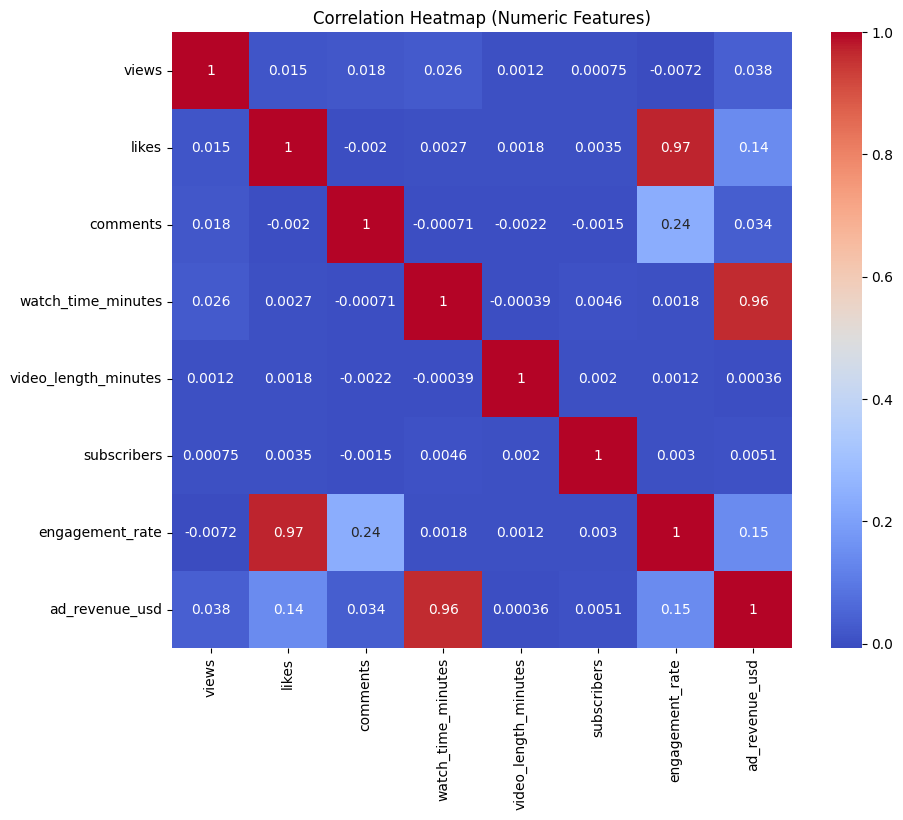

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation matrix
corr = df_enc.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_enc[numeric_cols + ['ad_revenue_usd']].corr(), cmap='coolwarm', annot=True)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

In [21]:
# target variable
y = df_enc["ad_revenue_usd"]

# feature variables
X = df_enc.drop("ad_revenue_usd", axis=1)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

In [24]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R2 score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

R2 score: 0.9525765067458816
Mean Squared Error: 181.70194007593835
Root Mean Squared Error: 13.479686200944677
Mean Absolute Error: 3.1236539351022565


In [25]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

In [26]:
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

print("Ridge Regression Results:")
print("R2 score:", r2_score(y_test, y_pred_ridge))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_ridge))
print("Root Mean Squared Error:", rmse_ridge)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_ridge))

Ridge Regression Results:
R2 score: 0.9525785427972304
Mean Squared Error: 181.69413899561297
Root Mean Squared Error: 13.479396833523857
Mean Absolute Error: 3.121388577209692


In [27]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

In [28]:
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

print("Lasso Regression Results:")
print("R2 score:", r2_score(y_test, y_pred_lasso))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lasso))
print("Root Mean Squared Error:", rmse_lasso)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_lasso))

Lasso Regression Results:
R2 score: 0.952590206529751
Mean Squared Error: 181.64944969328454
Root Mean Squared Error: 13.477739042335125
Mean Absolute Error: 3.122538541390809


In [29]:
rf_model = RandomForestRegressor(n_estimators=25, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [30]:
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("Random Forest Results:")
print("R2 score:", r2_score(y_test, y_pred_rf))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("Root Mean Squared Error:", rmse_rf)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_rf))

Random Forest Results:
R2 score: 0.9520778203279953
Mean Squared Error: 183.6126447373163
Root Mean Squared Error: 13.55037433937957
Mean Absolute Error: 3.697160323026322


In [31]:
gbr_model = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, max_depth=3, random_state=42)
gbr_model.fit(X_train, y_train)
y_pred_gbr = gbr_model.predict(X_test)

In [32]:
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))

print("Gradient Boosting Results:")
print("R2 score:", r2_score(y_test, y_pred_gbr))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_gbr))
print("Root Mean Squared Error:", rmse_gbr)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_gbr))

Gradient Boosting Results:
R2 score: 0.9518326006522
Mean Squared Error: 184.55219785285814
Root Mean Squared Error: 13.584999000841265
Mean Absolute Error: 4.073893712261578


In [33]:
mdl_res = {
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Random Forest', 'Gradient Boosting'],
    'R2 Score': [0.9526, 0.9526, 0.9526, 0.9521, 0.9518],
    'MSE': [181.70, 181.69, 181.65, 183.61, 184.55],
    'RMSE': [13.48, 13.48, 13.47, 13.55, 13.58],
    'MAE': [3.12, 3.12, 3.12, 3.70, 4.07]
}


res_df = pd.DataFrame(mdl_res)

In [34]:
res_df

,Model,R2 Score,MSE,RMSE,MAE
0,Linear Regression,0.9526,181.70,13.48,3.12
1,Ridge Regression,0.9526,181.69,13.48,3.12
2,Lasso Regression,0.9526,181.65,13.47,3.12
3,Random Forest,0.9521,183.61,13.55,3.70
4,Gradient Boosting,0.9518,184.55,13.58,4.07


In [35]:
models = {
    'Linear Regression': lr_model,
    'Ridge Regression': ridge_model,
    'Lasso Regression': lasso_model,
    'Random Forest': rf_model,
    'Gradient Boosting': gbr_model
}

In [36]:
import joblib

# Assuming 'models' dictionary contains your trained models
best_model = models['Linear Regression']

# Save to a pickle file
joblib.dump(best_model, 'linear_regression_model.pkl')

print("Model saved as 'linear_regression_model.pkl'")

Model saved as 'linear_regression_model.pkl'


In [37]:
# Load the model
loaded_model = joblib.load('linear_regression_model.pkl')

# Use it for predictions
y_pred = loaded_model.predict(X_test)  # X_test should have same features as used during training

In [39]:
%%writefile app.py
# paste the README text here
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import os

# Page config
st.set_page_config(
    page_title="Content Monetization Modeler",
    layout="wide",
    page_icon="💰"
)

# Custom styling
st.markdown("""
    <style>
    body {background-color:#0e1117; color:#fff;}
    .sidebar .sidebar-content {background-color:#1c1c24;}
    h1, h2, h3, h4 { color: #F9FAFB !important; }
    .stNumberInput label, .stSelectbox label {
        color: #E0E0E0 !important;
    }
    </style>
""", unsafe_allow_html=True)

st.title("🔮 Predict YouTube Ad Revenue")

# Load model
MODEL_PATH = 'I:/Project/linear_regression_model.pkl'
if not os.path.exists(MODEL_PATH):
    st.error("❌ Model file not found. Please check the path.")
    st.stop()

model = joblib.load(MODEL_PATH)

# Sidebar for file upload
st.sidebar.header("/content/Content-Monetization-Modeler/youtube_ad_revenue_dataset.csv")
uploaded_file = st.sidebar.file_uploader("Choose a CSV file", type=["csv"])

# Manual input section
st.subheader("✍️ Enter Video Feature Values")

feature_cols = [
    'video_duration_minutes',
    'views',
    'likes',
    'comments',
    'subscribers_gained',
    'avg_view_duration_seconds'
]

input_data = {}
cols_per_row = 3
rows = (len(feature_cols) + cols_per_row - 1) // cols_per_row

for i in range(rows):
    cols = st.columns(cols_per_row)
    for j in range(cols_per_row):
        idx = i * cols_per_row + j
        if idx < len(feature_cols):
            col_name = feature_cols[idx]
            input_data[col_name] = cols[j].number_input(f"{col_name}", value=0.0)

# Prediction button
if st.button("Predict"):
    input_df = pd.DataFrame([input_data])
    try:
        prediction = model.predict(input_df)[0]
        prediction = max(0, prediction)
        st.success(f"💰 **Predicted Ad Revenue:** ${prediction:,.2f}")
        if prediction == 0:
            st.info("This video may not generate ad revenue based on the current input values.")
    except Exception as e:
        st.error(f"Prediction error: {str(e)}")

# Optional: show uploaded file preview
if uploaded_file is not None:
    st.subheader("📄 Uploaded File Preview")
    df_uploaded = pd.read_csv(uploaded_file)
    st.dataframe(df_uploaded.head())


Writing app.py


In [40]:
%%writefile README.md


Writing README.md


In [42]:
%%writefile requirements.txt
Python 3.8+

Libraries:

pandas

numpy

scikit-learn

matplotlib

seaborn

streamlit

joblib

Overwriting requirements.txt
